<a href="https://colab.research.google.com/github/franciscourbina/Symmetry-breaking-on-nematic-vortex-through-quirality/blob/main/Ellipse_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import axes3d
import matplotlib.tri as tri
import numpy.linalg as linalg
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse
from astropy.utils.data import download_file

In [20]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
# In order to run this part of the code, you should download the data from: 
# https://github.com/franciscourbina/Symmetry-breaking-on-nematic-vortex-through-quirality
# Then save the data on a folder named "datos simulaciones" on your drive. 

datos_R = np.loadtxt('/content/drive/My Drive/datos simulaciones/Datos_real_1.dat',skiprows=28, usecols=(0,1,2), max_rows=9613, dtype=np.float32)
datos_I = np.loadtxt('/content/drive/My Drive/datos simulaciones/Datos_imaginario_1.dat',skiprows=28,usecols=(0,1,2) ,max_rows=9613, dtype=np.float32)

In [22]:
# Choosing useful data only
XY = datos_R[:,0:2]
mask = np.logical_and(XY[:,1] <= 10, XY[:,1]>=-10)
valores_real = datos_R[:,2][mask]
valores_imag = datos_I[:,2][mask]



In [23]:
# In order to graph the data, we need to interpolate it for getting a rectangular
# grid.
# More information can be found on the website:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/irregulardatagrid.html

npts = len(valores_real)

polarizacion = np.abs(valores_real*valores_imag, dtype=np.float32)
modulo = np.sqrt(valores_real**2 + valores_imag**2, dtype=np.float32)
fase = np.arctan2(valores_real, valores_imag)

xi = np.linspace(-50.1,50.1, npts, dtype=np.float32)
yi = np.linspace(-10.1, 10.1, npts, dtype=np.float32)
Xi, Yi = np.meshgrid(xi, yi)
triang = tri.Triangulation(XY[:,0][mask], XY[:,1][mask])

interpolator_pol = tri.LinearTriInterpolator(triang, polarizacion)
interpolator_modulo = tri.LinearTriInterpolator(triang, modulo)
interpolator_fase = tri.LinearTriInterpolator(triang, fase)

zi_pol = interpolator_pol(Xi, Yi)
zi_mod = interpolator_modulo(Xi,Yi)
zi_fase = interpolator_fase(Xi,Yi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'color'
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

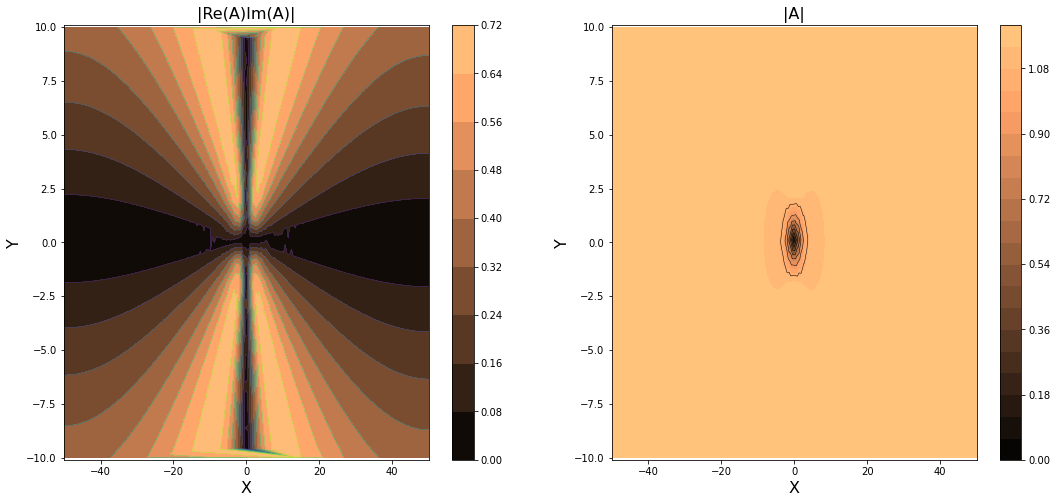

In [24]:
plt.clf()
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.contour(xi, yi, zi_pol, levels=10, linewidths=0.5, color='k')
cntr1 = plt.contourf(xi, yi, zi_pol, levels=10, cmap='copper')
plt.colorbar(cntr1)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.title('|Re(A)Im(A)|', fontsize=16)

plt.subplot(122)
plt.contour(xi,yi,zi_mod, levels=10, linewidths=0.5, colors='k')
cntr2 = plt.contourf(xi, yi, zi_mod, levels=20, cmap='copper')
plt.colorbar(cntr2)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.title('|A|', fontsize=16)

plt.show()

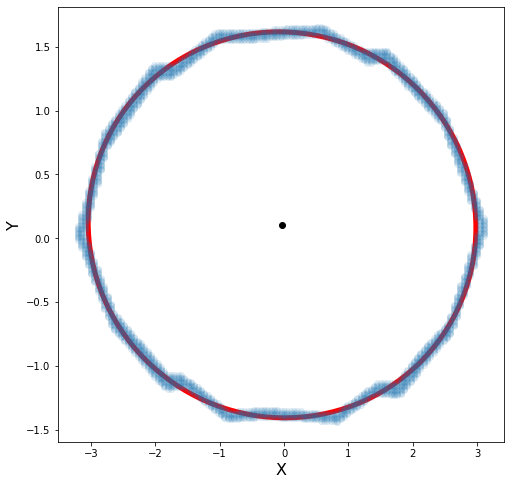

In [25]:
# Choosing only points where 0.99 < |A| < 1.01 in order to fit the ellipse. 
mask = np.logical_and(zi_mod<1.01,zi_mod > 0.99)
mask_x = Xi[mask]
mask_y = Yi[mask]

fig1, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,8))

# Ellipse fitting using scikit image. 
a_points = np.transpose(np.array([mask_x, mask_y]))
ell = EllipseModel()
ell.estimate(a_points)
xc, yc, a, b, theta = ell.params

ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor='red', facecolor='none', linewidth=5)

axs.scatter(xc, yc, color='black')
axs.add_patch(ell_patch)
axs.plot(mask_x,mask_y,'o', alpha=0.1)
axs.set_xlabel("X", fontsize=16)
axs.set_ylabel("Y", fontsize=16)
plt.show()

In [26]:
e = np.sqrt(np.max([a,b])**2-np.min([a,b])**2)/np.max([a,b])
print("The semi-mayor axis value is :{} \n The semi-minor axis value is :{} \n And eccentricity: {}".format(np.max([a,b]),np.min([a,b]),e))

The semi-mayor axis value is :3.013245852472494 
 The semi-minor axis value is :1.510848189654654 
 And eccentricity: 0.8652143109399513
